In [12]:
%matplotlib inline
%load_ext autoreload

%autoreload 2

In [1]:
from learn import *

In [1]:
%%time
%run script 0 --gpu_start=0 --num_gpus=6 --bs=192 --lr 1e-2 --num_slice=9 \
    --use_wd_sched --wd 0.025 --n_cycles 3 --model_name unet
# --start --learn

CPU times: user 1.58 s, sys: 657 ms, total: 2.24 s
Wall time: 5.96 s


In [2]:
data = None

In [3]:
lr = 1e-3
lrs = np.array([lr / 9, lr])
wd = args.wd
wds = np.array([wd / 3, wd])
use_wd_sched = True
is_eval, is_pred = False, False
# bs = 90

In [3]:
is_eval, is_pred = False, False
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers=8, model_name=model_name,
                                         debug=False, data=data, num_slice=num_slice, sz=sz,
                                         is_eval=is_eval, is_pred=is_pred, rescale=args.rescale)


Data finished loading: data/train/AOI_2_Vegas_Train


In [4]:
learn.freeze_to(1)

In [5]:
learn.lr_find()

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      2.05482    2.394343   0.825848   0.082062  



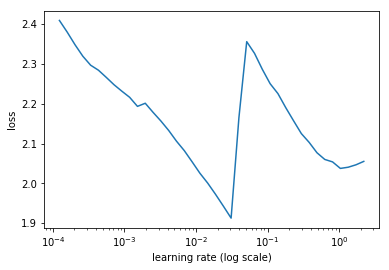

In [6]:
learn.sched.plot()

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      1.640429   1.448218   0.657958   0.347888  
    1      1.161429   0.871218   0.873161   0.497214      
    2      0.976419   0.862791   0.861278   0.508777       
    3      0.897229   0.789725   0.892945   0.505642       
    4      0.832734   0.783849   0.862508   0.539021       
    5      0.795077   0.739387   0.877096   0.550189       
    6      0.783916   0.730405   0.881345   0.55082        



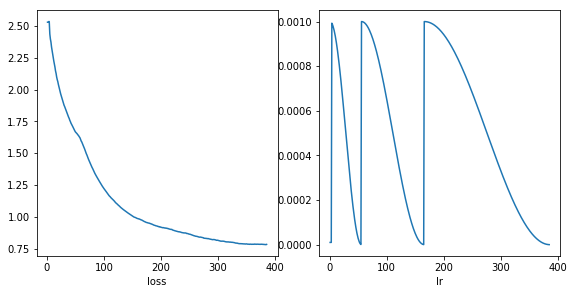

In [7]:
lr = 1e-3
lrs = np.array([lr / 9, lr])
wd = args.wd
wds = np.array([wd / 3, wd])
use_wd_sched = True

train_and_plot(learn, 0, 'ternaus-full', lrs = lrs, n_cycles=3, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.783708   0.701442   0.883956   0.565119  
    1      0.764181   0.681892   0.891231   0.564366       
    2      0.738741   0.687226   0.883282   0.569578       
    3      0.737025   0.653562   0.894715   0.576712       
    4      0.723944   0.646267   0.902865   0.571827       
    5      0.70815    0.651969   0.888604   0.58442        
    7      0.718864   0.72283    0.86713    0.56309        
    8      0.707309   0.630597   0.905589   0.578655       
    9      0.698368   0.623437   0.909799   0.579306       
    10     0.687445   0.708303   0.865057   0.574031       
    11     0.678008   0.597939   0.905183   0.600574       
    12     0.665769   0.604101   0.900619   0.602233       
    13     0.660665   0.600412   0.900593   0.604451       
    14     0.6541     0.60474    0.897928   0.604596       



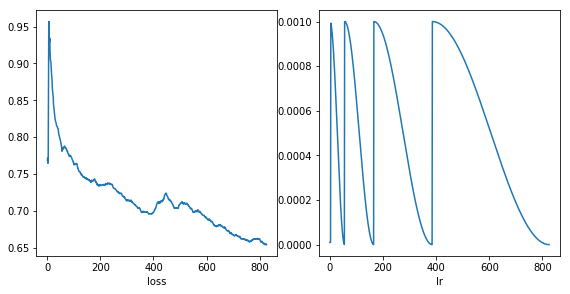

In [8]:
lr = 1e-3
lrs = np.array([lr / 9, lr])
learn.unfreeze()
train_and_plot(learn, 1, 'ternaus-full', lrs = lrs, n_cycles=4, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')

Paris

In [9]:
data = None
datapath = datapaths[1]
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers=8, model_name=model_name,
                                         debug=False, data=data, num_slice=25, sz=sz,
                                         is_eval=is_eval, is_pred=is_pred, rescale=args.rescale)


Data finished loading: data/train/AOI_3_Paris_Train


In [11]:
learn.load('ternaus-full_1')
learn.unfreeze()

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      1.199298   0.980368   0.920758   0.363638  
    1      1.049172   0.901595   0.926726   0.394709      
    2      0.965013   0.841193   0.932188   0.419807       
    3      0.973183   0.892372   0.920248   0.405306       
    4      0.943291   0.832865   0.933489   0.420072       
    5      0.907452   0.815124   0.936254   0.427145       
    6      0.889153   0.804334   0.935969   0.434005       
    7      0.924427   0.830732   0.934483   0.426131       
    8      0.907385   0.803582   0.934077   0.435092       
    9      0.904214   0.795672   0.942993   0.429388       
    10     0.886895   0.828789   0.926713   0.429106       
    11     0.872153   0.786606   0.935426   0.443278       
    12     0.857969   0.764431   0.940904   0.44835        
    13     0.84897    0.775172   0.936925   0.448035       
    14     0.844541   0.771115   0.937757   0.448732       



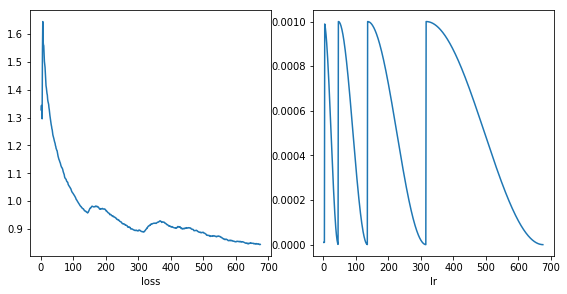

In [12]:
lr = 1e-3
lrs = np.array([lr/3, lr])
train_and_plot(learn, 2, 'ternaus-full', lrs = lrs, n_cycles=4, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')

Shanghai

In [13]:
data = None
datapath = datapaths[2]
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers=8, model_name=model_name,
                                         debug=False, data=data, num_slice=9, sz=sz,
                                         is_eval=is_eval, is_pred=is_pred, rescale=args.rescale)


Data finished loading: data/train/AOI_4_Shanghai_Train


In [14]:
learn.load('ternaus-full_2')

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      1.054485   0.970383   0.887595   0.393     
    1      1.017073   0.96215    0.899735   0.390281      
    2      1.00212    0.952961   0.89767    0.395868      
    3      0.99902    0.957076   0.879016   0.407089       
    4      0.988006   0.93633    0.899623   0.402232       
    5      0.992733   0.931861   0.894089   0.407526       
    6      0.97871    0.930143   0.896792   0.406469       
    7      0.990695   0.934711   0.895693   0.406081       
    8      0.983538   0.922801   0.897302   0.409606       
    9      0.980885   0.929613   0.897277   0.406541       
    10     0.971375   0.919726   0.898829   0.409981       
    11     0.965365   0.919695   0.900647   0.408561       
    12     0.963641   0.919366   0.901768   0.407837       
    13     0.963602   0.91305    0.897995   0.413041       
    14     0.956809   0.913634   0.898045   0.412762       



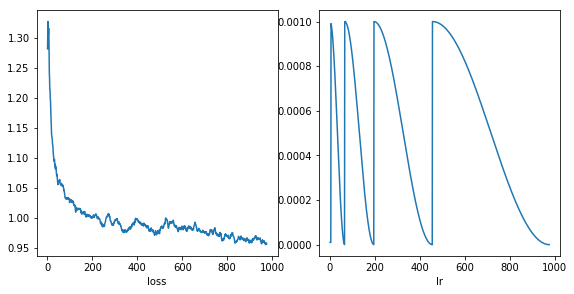

In [15]:
train_and_plot(learn, 3, 'ternaus-full', lrs = lrs, n_cycles=4, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')

Khartoum

In [16]:
data = None

In [17]:
datapath = datapaths[3]
learn, denorm, data = learner_on_dataset(datapath, bs, device_ids, num_workers=8, model_name=model_name,
                                         debug=False, data=data, num_slice=25, sz=sz,
                                         is_eval=is_eval, is_pred=is_pred, rescale=args.rescale)


Data finished loading: data/train/AOI_5_Khartoum_Train


In [18]:
learn.load('ternaus-full_3')

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      1.067094   0.893034   0.861128   0.466102  
    1      0.953381   0.828023   0.863725   0.495895       
    2      0.894819   0.799938   0.876429   0.500508       
    3      0.866316   0.772124   0.892707   0.496801       
    4      0.838731   0.774929   0.870367   0.520326       
    5      0.823722   0.7432     0.88819    0.520723       
    6      0.81136    0.748221   0.883101   0.522922       
    7      0.824293   0.754344   0.878882   0.522292       
    8      0.814889   0.734277   0.885949   0.52777        
    9      0.805425   0.746474   0.881921   0.526647       
    10     0.802545   0.734289   0.886166   0.527522       
    11     0.800589   0.740506   0.883798   0.527827       
    12     0.792763   0.727009   0.88861    0.529856       
    13     0.791384   0.725196   0.890308   0.528736       
    14     0.789186   0.727442   0.888256   0.530192       



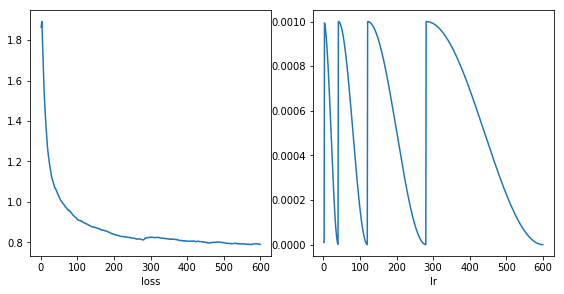

In [19]:
train_and_plot(learn, 4, 'ternaus-full', lrs = lrs, n_cycles=4, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='ternaus-full')


Data finished loading: data/train/AOI_2_Vegas_Train


epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.777115   0.727808   0.880258   0.550234  
    1      0.730802   0.679251   0.88825    0.571686         
    2      0.721095   0.701776   0.880186   0.565576         
    3      0.691772   0.679171   0.880558   0.580537         
    4      0.67875    0.622909   0.899371   0.595028         
    5      0.672903   0.618045   0.898652   0.598947         
    6      0.693215   0.645399   0.890913   0.588146         
    7      0.694178   0.673356   0.878034   0.583977         
    8      0.669932   0.632036   0.897433   0.591021         
    9      0.681705   0.593121   0.909589   0.604395         
    10     0.652558   0.619382   0.893196   0.603925         
    11     0.650916   0.598686   0.899227   0.610697         
    12     0.635735   0.590899   0.902176   0.612159         
    13     0.63829    0.5882     0.902962   0.613188         
    14     0.6736     0.643301   0.912923   0.568978         
    15     0.66

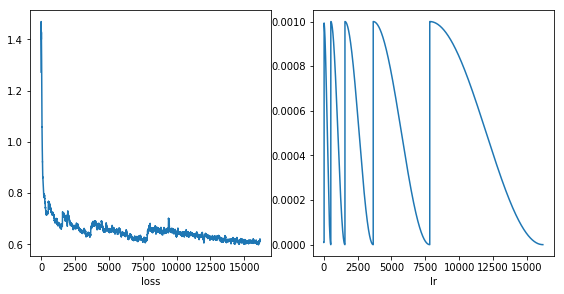

In [2]:
%%time
%run script 0 --gpu_start=0 --num_gpus=1 --bs=40 --lr 1e-3 --num_slice=9 \
    --use_wd_sched --wd 0.025 --n_cycles 5 --model_name unet --learn --start --load_starter ternaus-full_4

In [ ]:
lrs = np.array(lrs) / 10
train_and_plot(learn, 1, 'unet-vegas', lrs = lrs, n_cycles=6, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='unet-vegas')

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.612467   0.557286   0.907184   0.628863  
    1      0.607601   0.555876   0.907856   0.629098         
    2      0.604957   0.556039   0.907713   0.629155         
    3      0.615014   0.557531   0.907279   0.628749         
 79%|███████▉  | 207/261 [04:12<01:05,  1.22s/it, loss=0.609]    4      0.608332   0.556534   0.907314   0.629229  
    5      0.616149   0.556423   0.907551   0.62904          
    6      0.609601   0.556606   0.907555   0.628913         
    7      0.612291   0.560832   0.905683   0.628153         
    8      0.615753   0.559778   0.906294   0.62825          
    9      0.613658   0.555161   0.90809    0.629361         
 69%|██████▉   | 180/261 [03:44<01:41,  1.25s/it, loss=0.603]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    12     0.607938   0.557388   0.907051   0.62897   
    13     0.612724   0.556104   0.907684   0.62913          
    14     0.612536   0.556432   0.907533   0.629079         
    15     0.614123   0.554061   0.908424   0.62953          
    16     0.611354   0.556184   0.9073     0.629527         
    17     0.608305   0.560533   0.906098   0.627894         
    18     0.606699   0.55823    0.906731   0.628808         
    19     0.611695   0.556405   0.907742   0.628882         
    20     0.598104   0.553151   0.909022   0.629535         
    21     0.611345   0.557861   0.906912   0.628805         
    22     0.615994   0.555349   0.907789   0.629487         
    23     0.611864   0.556965   0.907092   0.62915          
    24     0.59955    0.556391   0.907376   0.629251         
    25     0.600353   0.55362    0.908744   0.629546         
    26     0.613945   0.556645   0.907325   0.629146         
    27     0.608971   0.556279   0.907535   0.629168         
    28     0.60

Another 30 epochs here not recorded

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.400484   0.327414   0.942329   0.743546  
    1      0.401807   0.327722   0.942125   0.743569         
    2      0.401112   0.326909   0.942743   0.743239         
    3      0.41622    0.32754    0.942057   0.743999         
    4      0.400742   0.327423   0.942424   0.74333          
    5      0.398883   0.327781   0.942243   0.743408         
    6      0.399912   0.32659    0.942872   0.743371         
    7      0.39598    0.325024   0.943307   0.74395          
    8      0.398028   0.326971   0.942329   0.743801         
    9      0.3992     0.326177   0.94294    0.74357          
    10     0.397578   0.325702   0.943157   0.743684         
    11     0.392842   0.32653    0.942798   0.743645         
    12     0.396419   0.325581   0.942909   0.74411          
    13     0.399751   0.32589    0.942802   0.744004         
    14     0.396071   0.325626   0.942986   0.743936         



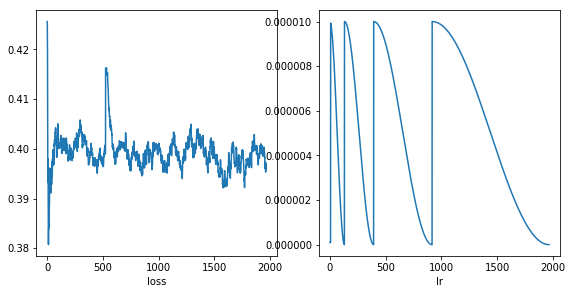

In [4]:
train_and_plot(learn, 0, 'unet-vegas', lrs = lrs, n_cycles=4, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='unet-vegas')

Tested at this point

In [7]:
%%time
train_and_plot(learn, 1, 'unet-vegas', lrs = lrs, n_cycles=4, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='unet-vegas')

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.394653   0.324245   0.943127   0.744701  
    1      0.397219   0.322838   0.94397    0.744531         
    2      0.398845   0.324307   0.943053   0.744734         
    3      0.399918   0.324454   0.942778   0.745049         
    4      0.396083   0.325845   0.942533   0.744128         
    5      0.39329    0.32463    0.942792   0.744938         
    6      0.386345   0.32385    0.943356   0.744634         
    7      0.389072   0.324015   0.944811   0.742498         
    8      0.394637   0.323617   0.943217   0.744968         
    9      0.396639   0.322914   0.943397   0.745471         
    10     0.395588   0.325739   0.942579   0.744282         
 21%|██▏       | 28/131 [00:42<02:36,  1.52s/it, loss=0.395]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
lrs /= 5

HBox(children=(IntProgress(value=0, description='Epoch', max=63), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.39506    0.323555   0.943294   0.744918  
    1      0.394365   0.323463   0.943406   0.74483          
    2      0.394751   0.323537   0.943378   0.744813         
    3      0.396609   0.323757   0.943231   0.744862         
    4      0.394367   0.32359    0.943301   0.74488          
    5      0.392578   0.323741   0.943229   0.744858         
    6      0.400637   0.323757   0.943212   0.744876         
    7      0.395666   0.323455   0.943362   0.7449           
    8      0.396845   0.323765   0.943176   0.744951         
    9      0.400331   0.323514   0.943302   0.744973         
    10     0.395578   0.323697   0.943216   0.744952         
 22%|██▏       | 29/131 [00:42<02:29,  1.46s/it, loss=0.398]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    26     0.399414   0.323779   0.943209   0.744894         
    27     0.394563   0.323722   0.943234   0.744901         
    28     0.397392   0.323709   0.943243   0.744897         
    29     0.40597    0.323692   0.943255   0.744893         
    30     0.395957   0.323701   0.94325    0.744894         
    31     0.408221   0.324029   0.943056   0.74493          
    32     0.394008   0.323925   0.943102   0.744973         
    33     0.400782   0.323653   0.943275   0.744892         
    34     0.399822   0.323676   0.943312   0.744815         
    35     0.39582    0.323328   0.943463   0.744868         
    36     0.395788   0.323496   0.943257   0.745052         
    37     0.400316   0.323535   0.943265   0.745018         
  0%|          | 0/131 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    53     0.393471   0.323537   0.943271   0.744964         
    54     0.391548   0.32359    0.943244   0.74496          
    55     0.392974   0.323536   0.943261   0.744978         
    56     0.399463   0.323549   0.943256   0.744976         
    57     0.399467   0.323561   0.943249   0.74498          
    58     0.39731    0.323587   0.943236   0.744978         
    59     0.393053   0.323575   0.943244   0.744974         
    60     0.390381   0.323574   0.943245   0.744974         
    61     0.39555    0.323572   0.943246   0.744973         
    62     0.397391   0.323572   0.943246   0.744973         

CPU times: user 1d 16h 27min 50s, sys: 1d 2h 17min 39s, total: 2d 18h 45min 30s
Wall time: 4h 37min 14s


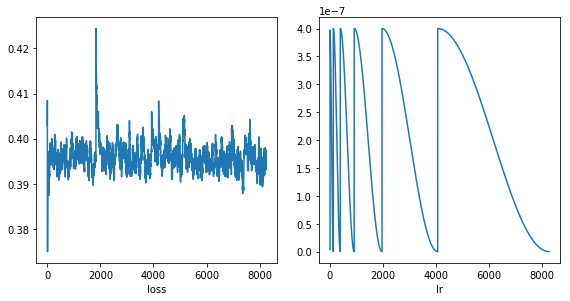

In [12]:
%%time
train_and_plot(learn, 2, 'unet-vegas', lrs = lrs, n_cycles=6, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='unet-vegas')

In [18]:
lrs *= 10

In [ ]:
%%time
train_and_plot(learn, 2, 'unet-vegas', lrs = lrs, n_cycles=6, wds=wds, use_wd_sched=use_wd_sched,
    cycle_len=1, cycle_mult=2, best_save_name='unet-vegas')

HBox(children=(IntProgress(value=0, description='Epoch', max=63), HTML(value='')))

epoch      trn_loss   val_loss   mask_acc   jaccard_coef_par 
    0      0.408      0.32337    0.943269   0.745116  
    1      0.400392   0.32406    0.942792   0.74535          
    2      0.395057   0.323017   0.943349   0.745291         
    3      0.394779   0.324588   0.942958   0.74473          
 79%|███████▉  | 104/131 [02:06<00:32,  1.22s/it, loss=0.395]    4      0.395919   0.323464   0.943763   0.744269  
    5      0.398638   0.324405   0.942861   0.744909         
    6      0.395939   0.323893   0.94315    0.744872         
    7      0.402217   0.32252    0.943821   0.745082         
    8      0.39446    0.322854   0.943808   0.744694         
    9      0.398646   0.322653   0.943939   0.744744         
    10     0.394947   0.324375   0.942963   0.744834         
    11     0.391396   0.323971   0.943249   0.744649         
    12     0.397659   0.323924   0.943254   0.744649         
    13     0.39094    0.324015   0.943189   0.744698         
    14     0.395423   0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    18     0.397221   0.324714   0.942583   0.745076         
    19     0.393434   0.322607   0.943565   0.745269         
    20     0.411042   0.325525   0.942151   0.745052         
    21     0.392      0.32317    0.943069   0.745408         
    22     0.396278   0.322772   0.943215   0.745527         
    23     0.392028   0.322525   0.943445   0.745376         
    24     0.39752    0.323415   0.942883   0.74555          
    25     0.395331   0.322585   0.943431   0.745412         
    26     0.396653   0.322683   0.943383   0.745425         
    27     0.392719   0.322627   0.943438   0.745353         
    28     0.396455   0.32289    0.943307   0.745335         
    29     0.394711   0.322821   0.943345   0.745337         
    30     0.386657   0.322814   0.943346   0.745341         
    31     0.393334   0.322372   0.94381    0.744948         
    32     0.39975    0.324549   0.942992   0.744447         
    33     0.399983   0.321867   0.94384    0.745432         
    34  

In [1]:
%%time
%run script 0 --gpu_start=2 --num_gpus=3 --bs=80 --lr 1e-5 --num_slice=9 \
    --use_wd_sched --wd 0.025 --n_cycles 4 --model_name unet --learn --start

HBox(children=(IntProgress(value=0, description='gt', max=1156), HTML(value='')))

HBox(children=(IntProgress(value=0, description='gt', max=2695), HTML(value='')))

MemoryError: 

CPU times: user 1min 26s, sys: 2min 12s, total: 3min 38s
Wall time: 2min 43s
